In [1]:
import json
import numpy as np
from pathlib import Path
from functional_program_vis_util  import visualize_functional_program

### Example program visualization

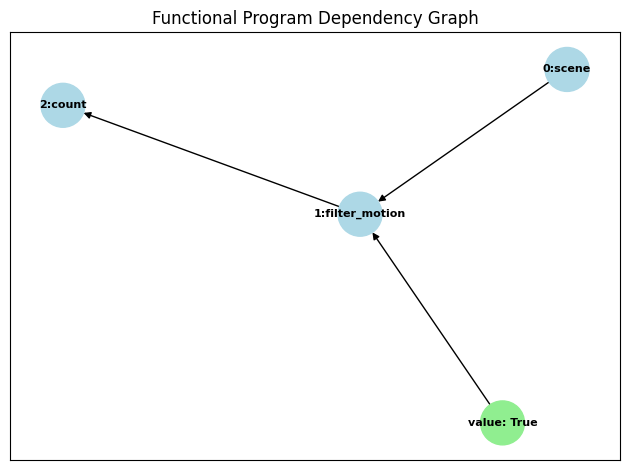

In [5]:
program = [
    {'type': 'scene', 'inputs': [], '_output': [0, 1, 2, 3], 'value_inputs': []},
    {'type': 'filter_size', 'inputs': [0], '_output': [0, 1, 2, 3], 'value_inputs': ['small']},
    {'type': 'filter_material', 'inputs': [1], '_output': [1, 2, 3], 'value_inputs': ['Metal']},
    {'type': 'filter_rotate', 'inputs': [2], '_output': [1], 'value_inputs': [False]},
    {'type': 'filter_shape', 'inputs': [3], '_output': [1], 'value_inputs': ['Cone']},
    {'type': 'unique', 'inputs': [4], '_output': 1, 'value_inputs': []},
    {'type': 'scene', 'inputs': [], '_output': [0, 1, 2, 3], 'value_inputs': []},
    {'type': 'filter_color', 'inputs': [6], '_output': [3], 'value_inputs': ['blue']},
    {'type': 'unique', 'inputs': [7], '_output': 3, 'value_inputs': []},
    {'type': 'relate_globally', 'inputs': [8], '_output': [], 'value_inputs': ['behind']},
    {'type': 'include', 'inputs': [5, 9], '_output': False, 'value_inputs': []}
]

program = [
    {"type": "scene", "inputs": [], "_output": [0, 1, 2], "value_inputs": []},
    {"type": "filter_motion", "inputs": [0], "_output": [2], "value_inputs": [True]},
    {"type": "count", "inputs": [1], "_output": 1, "value_inputs": []}
]

visualize_functional_program(program)


### Visualize debug questions

In [16]:
# load the data

split = "test"
dataset = "unicycle"
question_path = f"/workspaces/CycliST_dev/CycliST/output/questions/{dataset}/{split}/questions_counting_frequency.json"
vid_path = f"/workspaces/CycliST_dev/CycliST/output/videos/{dataset}/{split}/"

print("Loading data from:", question_path)

# read in json file
with open(question_path) as f:
    data = json.load(f)

l = len(data['questions'])
print("Total questions:", l)

# only print vals which have an answer count greater zero
for k in data['template_answer_counts']:
    print(k,":", {k:v for k, v in data['template_answer_counts'][k].items() if v > 0})
display(data['template_counts'])


# Counting cycles
#0 How many objects are moving linearly or orbiting in the scene?
#1 How many objects are changing color in the scene?
#2 How many objects are enlarging and shrinking in the scene?
#3 How many objects are orbiting in the scene?
#4 How many objects are rotating in the scene?
#5 How many objects are moving in a straight line in the scene?

# Cycle frequency
#0 There is a moving <Z> <C> <M> <CC> <RO> <E> <S>. What is its movement period in frames?
#1 There is an orbiting <Z> <C> <M> <CC> <RO> <E> <S>. What is its orbit period in frames?
#2 What is the linear movement period in frames of the moving <Z> <C> <M> <CC> <RO> <E> <S> away from the start and back?
#3 There is an orbiting <Z> <C> <M> <CC> <RO> <E> <S>. How many orbits does the object do in the video?
#4 There is an <Z> <C> <M> <CC> <RO> <E> <S> that moves back and forth. How often does the object go back and forth in the video?

# Cyclce representative
#0 There is an orbiting <Z> <C> <M> <CC> <RO> <E> <S>. What is the size of the object it is orbiting around?
#1 There is an orbiting <Z> <C> <M> <CC> <RO> <E> <S>. What is the color of the object it is orbiting around?

Loading data from: /workspaces/CycliST_dev/CycliST/output/questions/unicycle/test/questions_counting_frequency.json
Total questions: 244
counting_frequency.json_0 : {'32': 8, '80': 32, '160': 30}
counting_frequency.json_1 : {'32': 2, '80': 32, '160': 32}
counting_frequency.json_2 : {'32': 8, '80': 28, '160': 28}
counting_frequency.json_3 : {'1': 32, '2': 31, '5': 1}
counting_frequency.json_4 : {'1': 30, '2': 30, '5': 2}


{'counting_frequency.json_0': 70,
 'counting_frequency.json_1': 66,
 'counting_frequency.json_2': 64,
 'counting_frequency.json_3': 64,
 'counting_frequency.json_4': 62}

Random question index: 65
Question There is a moving big thing. What is its movement period in frames?
Answer 80
{'type': 'scene', 'inputs': [], '_output': [0, 1, 2], 'value_inputs': []}
{'type': 'filter_motion', 'inputs': [0], '_output': [2], 'value_inputs': [True]}
{'type': 'filter_size', 'inputs': [1], '_output': [2], 'value_inputs': ['large']}
{'type': 'unique', 'inputs': [2], '_output': 2, 'value_inputs': []}
{'type': 'query_motion_period', 'inputs': [3], '_output': 80, 'value_inputs': []}
Video path: unicycle_test_orbit_138.mp4
Video path: /workspaces/CycliST_dev/CycliST/output/videos/unicycle/test/unicycle_test_orbit_138.mp4


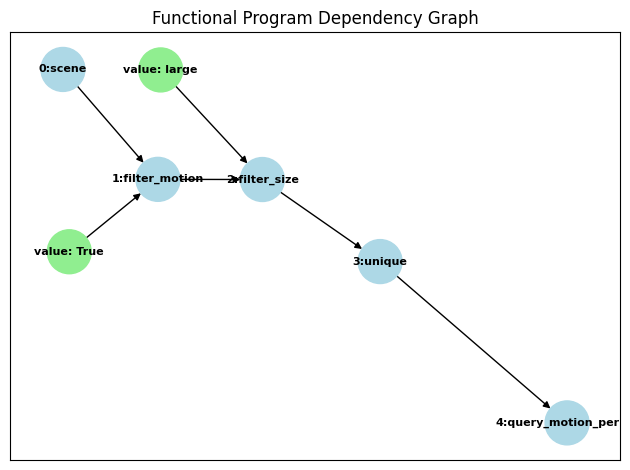

In [17]:
#select a random question
family_index = 0

while True:
    randint = np.random.randint(0, l)
    if data['questions'][randint]['question_family_index'] == family_index:
        break
    
print("Random question index:", randint)
print("Question",data['questions'][randint]['question'])
print("Answer",data['questions'][randint]['answer'])

prog = data['questions'][randint]['program']
for i in prog:
    print(i)


print("Video path:", data['questions'][randint]['video_filename'])
path = Path(vid_path,  data['questions'][randint]['video_filename'])
print("Video path:", path)

# load mp4 file and display it
from IPython.display import Video
video = Video(path, embed=True, width=600, height=400)
from IPython.display import display
display(video)

visualize_functional_program(prog)

